# SVM for classification

Load IRIS dataset, check its contents:


In [34]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [35]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [36]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear', random_state=8)
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
#Iris is already loaaded, now we will selct only first 2 features
X = iris.data[:, :2]

# Now lets filter out samples where iris.target equals 2

X_filtered = X[iris.target != 2]
y_filtered = iris.target[iris.target != 2]

# X_filtered contains only the first two features for samples where the target is not 2
# y_filtered contains the corresponding target values (0 or 1), excluding any samples with target value 2

In [39]:
X.shape
#print(X)
#print(X_filtered)
#print(y_filtered)

(150, 2)

In [40]:
X_filtered.shape

(100, 2)

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

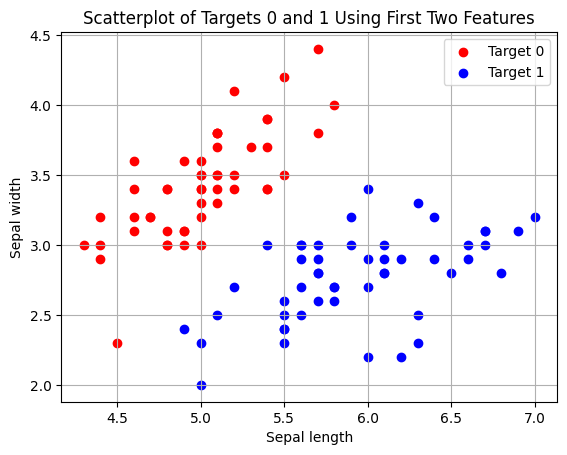

In [41]:
import matplotlib.pyplot as plt

# Indices for target 0
indices_0 = y_filtered == 0
# Indices for target 1
indices_1 = y_filtered == 1

# For target 0
plt.scatter(X_filtered[indices_0, 0], X_filtered[indices_0, 1], color='red', label='Target 0')
# For target 1
plt.scatter(X_filtered[indices_1, 0], X_filtered[indices_1, 1], color='blue', label='Target 1')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Scatterplot of Targets 0 and 1 Using First Two Features')
plt.grid(True)
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X = iris.data[:, :2]
y = iris.target

# Eliminate data where iris.target == 2
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets thanks to the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

#Initialiize the SVM Classifier with the default value of C
clf_default = SVC(kernel='linear')
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)

# Then we calculate the accuracy score with the default C
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f'Accuracy with default C: {accuracy_default:.2f}')

# Now we initialize the SVM classifier with C = 200
clf_C_200 = SVC(kernel='linear', C=200)
# Train the classifier on the training set
clf_C_200.fit(X_train, y_train)
# Make predictions on the testing set
y_pred_C_200 = clf_C_200.predict(X_test)
# Calculate and print the accuracy with C set to 200
accuracy_C_200 = accuracy_score(y_test, y_pred_C_200)
print(f'Accuracy with C=200: {accuracy_C_200:.2f}')

Accuracy with default C: 0.95
Accuracy with C=200: 1.00


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

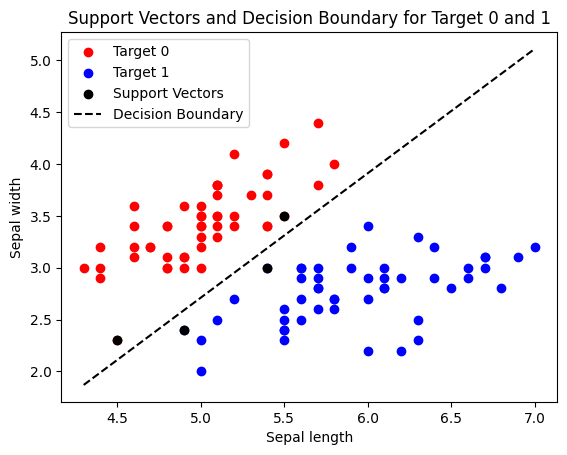

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# We take the first two features and targets 0 and 1
X = iris.data[:100, :2]  # iris.data has the first two features
y = iris.target[:100]    # iris.target has the target labels

# We split the data by class
X0 = X[y == 0]
X1 = X[y == 1]

# Then we train the SVM classifier
svm_model = SVC(kernel='linear', C=200)
svm_model.fit(X, y)

# Plot the data points for target 0 in red
plt.scatter(X0[:, 0], X0[:, 1], color='red', label='Target 0')

# Plot the data points for target 1 in blue
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Target 1')

# Plot the support vectors in black
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],  color='black', label='Support Vectors')

# Calculate the decision boundary line
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x_boundary = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
#We compute the equation of the boundary line  [w0 w1]*[x0 x1] + b = 0
y_boundary = -(w[0] * x_boundary + b) / w[1]

# Plot the decision boundary line
plt.plot(x_boundary, y_boundary, 'k--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Support Vectors and Decision Boundary for Target 0 and 1')
plt.legend()
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

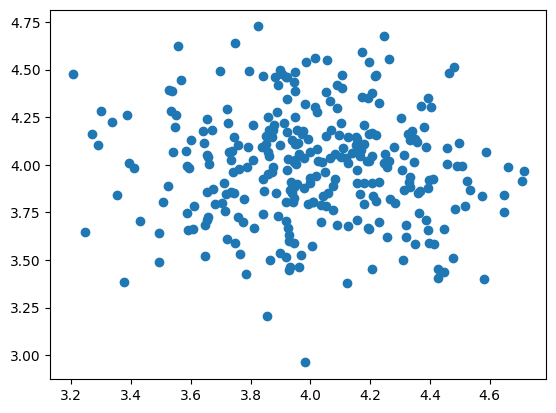

In [44]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

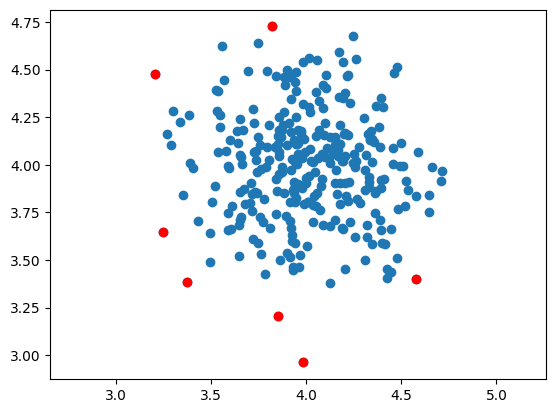

In [45]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

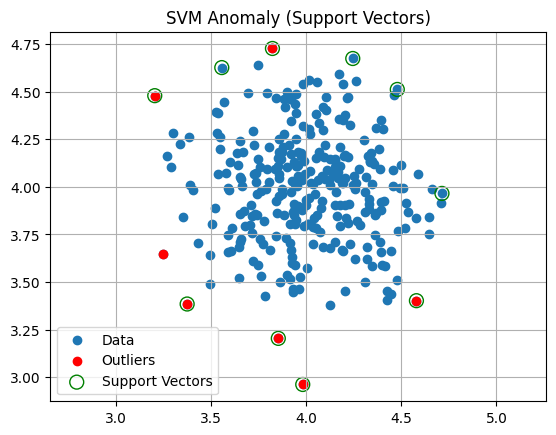

In [46]:
# Extract support vectors
support_vectors = SVMmodelOne.support_vectors_

# Plot the original data
plt.scatter(x[:, 0], x[:, 1], label='Data')

# Plot the outliers in red
plt.scatter(values[:, 0], values[:, 1], color='red', label='Outliers')

# Highlight the support vectors in green
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            facecolors='none', edgecolors='green', s=100, label='Support Vectors')

plt.axis('equal')
plt.title('SVM Anomaly (Support Vectors)')
plt.legend()
plt.grid(True)
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


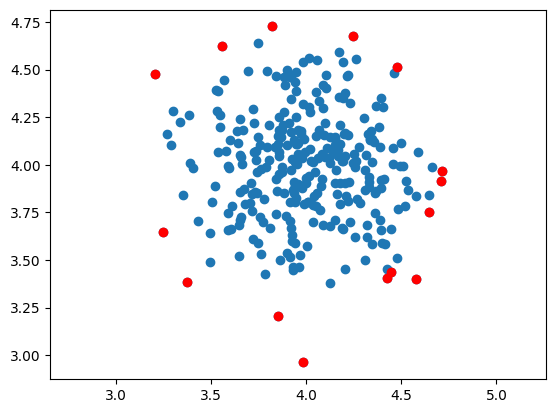

In [47]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



5% of the dataset in red represented the anomalies
